In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=100, n_informative=50, noise=100.0, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape)

(750, 100) (250, 100)


In [4]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_model.score(X_test, y_test)

0.9366460491832571

In [5]:
iterations = 1000

100%|██████████| 1000/1000 [00:05<00:00, 180.22it/s]


0.937270247116012

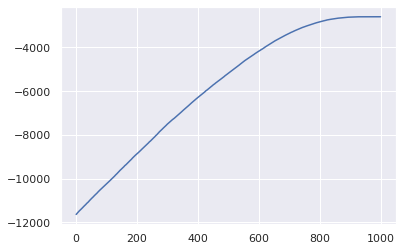

In [6]:
from algorithms import SimpleESRegressor
from objectives import RSSObjective

es_model = SimpleESRegressor(objective=RSSObjective(), n_iter=1000, random_state=0)
es_model.fit(X_train, y_train)
plt.plot(range(iterations), es_model.history_)
es_model.score(X_test, y_test)

100%|██████████| 1000/1000 [00:10<00:00, 97.80it/s]


0.9366223695807937

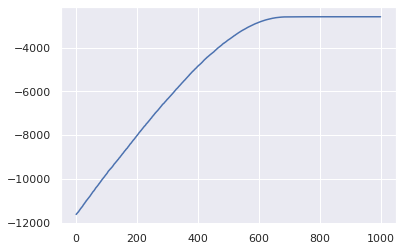

In [7]:
from algorithms import GeneticESRegressor

es_model = GeneticESRegressor(objective=RSSObjective(), n_iter=iterations, random_state=0)
es_model.fit(X_train, y_train)
plt.plot(range(iterations), es_model.history_)
es_model.score(X_test, y_test)

100%|██████████| 1000/1000 [00:04<00:00, 224.76it/s]


0.9366746651370852

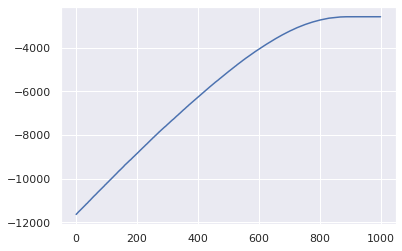

In [8]:
from algorithms import NaturalESRegressor

es_model = NaturalESRegressor(objective=RSSObjective(), n_iter=iterations, random_state=0)
es_model.fit(X_train, y_train)
plt.plot(range(iterations), es_model.history_)
es_model.score(X_test, y_test)

In [9]:
iterations = 2500

100%|██████████| 2500/2500 [00:04<00:00, 552.46it/s]


0.9357044210399493

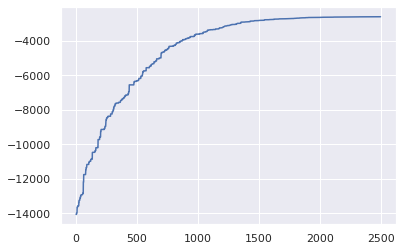

In [10]:
from algorithms import DifferentialEvolutionRegressor

bounds = np.array([(-10, 110)] * (1 + X_train.shape[1]))

de_model = DifferentialEvolutionRegressor(objective=RSSObjective(), n_iter=iterations, random_state=0, bounds=bounds)
de_model.fit(X_train, y_train)
plt.plot(range(iterations), de_model.history_)
de_model.score(X_test, y_test)